<a href="https://colab.research.google.com/github/janjuatest/NLP/blob/main/NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
import seaborn as sns
import nltk
import string

In [4]:
nltk.download_shell()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> stopwords
      Unzipping corpora/stopwords.zip.

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


Import the list of stopwords from NLTK

In [14]:
from nltk.corpus import stopwords

In [6]:
df=pd.read_csv('SMSSpamCollection',sep='\t')

In [8]:
df.columns=['Label','Message']

Read the messages into a data frame with columns Label and Message

In [9]:
df

,Label,Message
0,ham,Ok lar... Joking wif u oni...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,U dun say so early hor... U c already then say...
3,ham,"Nah I don't think he goes to usf, he lives aro..."
4,spam,FreeMsg Hey there darling it's been 3 week's n...
...,...,...
5566,spam,This is the 2nd time we have tried 2 contact u...
5567,ham,Will ü b going to esplanade fr home?
5568,ham,"Pity, * was in mood for that. So...any other s..."
5569,ham,The guy did some bitching but I acted like i'd...


In [10]:
df['LengthSMS']=df['Message'].apply(len)

In [11]:
df

,Label,Message,LengthSMS
0,ham,Ok lar... Joking wif u oni...,29
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
2,ham,U dun say so early hor... U c already then say...,49
3,ham,"Nah I don't think he goes to usf, he lives aro...",61
4,spam,FreeMsg Hey there darling it's been 3 week's n...,147
...,...,...,...
5566,spam,This is the 2nd time we have tried 2 contact u...,160
5567,ham,Will ü b going to esplanade fr home?,36
5568,ham,"Pity, * was in mood for that. So...any other s...",57
5569,ham,The guy did some bitching but I acted like i'd...,125


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


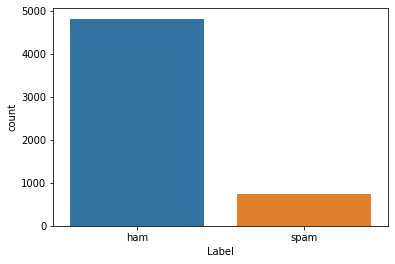

In [50]:
sns.countplot(df['Label'])

The data is unbalanced so learning might not be very good
There will be more false positives are more likely

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5571 entries, 0 to 5570
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Label      5571 non-null   object
 1   Message    5571 non-null   object
 2   LengthSMS  5571 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 130.7+ KB


There are a total of 5571 messages

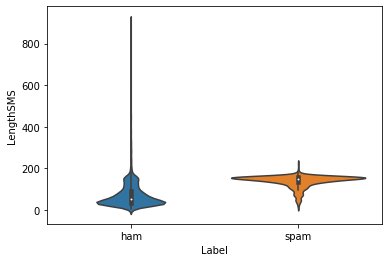

In [12]:
sns.violinplot(data=df,x='Label',y='LengthSMS')

As can be seen above the spam messages are longer and have lower spread in number of characters

Now lets create a function to process the messages
1. Remove punctuations
2. Remove Stopword i.e. common words
3. Create an array of keywords for each message


In [23]:
def TextProcess(stringGiven):
  nopunc=[char for char in stringGiven if char not in string.punctuation]
  messageNP=''.join(nopunc)
  keywords=[word for word in messageNP.split() if word not in stopwords.words('english')]
  return keywords


In [25]:
TextProcess("I will be coming ...home")

['I', 'coming', 'home']

Beautiful our function works as follows
1. It removes the punctuation
2. Then combines the characters back into words and makes a string
3. Then splits the string into words and remove the common stop words like will , be etc.

In [26]:
TextProcess(df['Message'][10])

['SIX',
 'chances',
 'win',
 'CASH',
 'From',
 '100',
 '20000',
 'pounds',
 'txt',
 'CSH11',
 'send',
 '87575',
 'Cost',
 '150pday',
 '6days',
 '16',
 'TsandCs',
 'apply',
 'Reply',
 'HL',
 '4',
 'info']

In [27]:
from sklearn.feature_extraction.text import CountVectorizer

Now lets beging the NLP by first making our bag of words and vectorizing the messages

In [30]:
myBag=CountVectorizer(analyzer=TextProcess)

In [31]:
myBag.fit(df['Message'])

CountVectorizer(analyzer=<function TextProcess at 0x7fe88a4e6bf8>, binary=False,
                decode_error='strict', dtype=<class 'numpy.int64'>,
                encoding='utf-8', input='content', lowercase=True, max_df=1.0,
                max_features=None, min_df=1, ngram_range=(1, 1),
                preprocessor=None, stop_words=None, strip_accents=None,
                token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None,
                vocabulary=None)

The vectorizer has been fitted

In [32]:
myBag.vocabulary_

{'Ok': 3176,
 'lar': 7890,
 'Joking': 2534,
 'wif': 11261,
 'u': 10887,
 'oni': 8779,
 'Free': 1992,
 'entry': 6521,
 '2': 423,
 'wkly': 11312,
 'comp': 5809,
 'win': 11273,
 'FA': 1881,
 'Cup': 1588,
 'final': 6747,
 'tkts': 10701,
 '21st': 443,
 'May': 2895,
 '2005': 430,
 'Text': 4094,
 '87121': 871,
 'receive': 9441,
 'questionstd': 9348,
 'txt': 10875,
 'rateTCs': 9389,
 'apply': 4921,
 '08452810075over18s': 73,
 'U': 4220,
 'dun': 6394,
 'say': 9743,
 'early': 6412,
 'hor': 7376,
 'c': 5451,
 'already': 4820,
 'Nah': 3046,
 'I': 2361,
 'dont': 6313,
 'think': 10622,
 'goes': 7067,
 'usf': 10988,
 'lives': 8031,
 'around': 4967,
 'though': 10639,
 'FreeMsg': 1994,
 'Hey': 2289,
 'darling': 6054,
 '3': 543,
 'weeks': 11200,
 'word': 11339,
 'back': 5083,
 'Id': 2423,
 'like': 7989,
 'fun': 6945,
 'still': 10282,
 'Tb': 4071,
 'ok': 8756,
 'XxX': 4563,
 'std': 10262,
 'chgs': 5657,
 'send': 9830,
 '£150': 11560,
 'rcv': 9398,
 'Even': 1850,
 'brother': 5383,
 'speak': 10160,
 'They'

Above is the vocabulary and the tokens

In [34]:
len(myBag.vocabulary_)

11614

The bag has 11614 words

In [37]:
sample=myBag.transform([df['Message'][1]])

In [38]:
print(sample)

  (0, 73)	1
  (0, 423)	1
  (0, 430)	1
  (0, 443)	1
  (0, 871)	1
  (0, 1588)	1
  (0, 1881)	2
  (0, 1992)	1
  (0, 2895)	1
  (0, 4094)	1
  (0, 4921)	1
  (0, 5809)	1
  (0, 6521)	2
  (0, 6747)	1
  (0, 9348)	1
  (0, 9389)	1
  (0, 9441)	1
  (0, 10701)	1
  (0, 10875)	1
  (0, 11273)	1
  (0, 11312)	1


The message below has been tokenized as above

In [39]:
df['Message'][1]

"Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"

In [41]:
messagesTokenized=myBag.transform(df['Message'])

Now we have tokenized all the messages in the dataframe and saved them in messagesTokenized

It is a sparse matrix with columns of keyword token IDs and rows with 1 if the keyword is in a message

In [42]:
from sklearn.model_selection import train_test_split

Now lets start the machine learning by doing the test train split of the data

In [43]:
X_train,X_test,y_train,y_test=train_test_split(messagesTokenized,df['Label'],test_size=0.25)

In [44]:
from sklearn.naive_bayes import MultinomialNB

MultinomialNB is good for NLP

In [45]:
NLPmodel=MultinomialNB()

In [46]:
NLPmodel.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

We have fitted the model to the train data

In [47]:
predictions=NLPmodel.predict(X_test)

THe above predicts the Labels from the test data

In [48]:
from sklearn.metrics import classification_report,confusion_matrix

Import the classification report for measuring accuracy and the confusion matrix to see the type of errors

In [49]:
print (confusion_matrix(y_test,predictions))

[[1193   25]
 [  10  165]]


As expected the false positives are more due to the unbalanced data

In [53]:
print (classification_report(y_test,predictions))

              precision    recall  f1-score   support

         ham       0.99      0.98      0.99      1218
        spam       0.87      0.94      0.90       175

    accuracy                           0.97      1393
   macro avg       0.93      0.96      0.94      1393
weighted avg       0.98      0.97      0.98      1393



We have achieved 97% accuracy which is pretty awesome